# **TUGAS PRAKTIKUM**

Instruksi Umum:

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

[insurance.csv](https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2Fm9cBZ7dbD9fZdm19VWFs%2Finsurance.csv?alt=media&token=f9e26d69-3bf9-4cd4-84d9-014eef365947)

Tugas 1: Multiple Linear Regression

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
file_path = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/dataset/insurance.csv'
df_insurance = pd.read_csv(file_path)
df_insurance.head()

X = df_insurance.drop("charges", axis=1)
y = df_insurance["charges"]

print("Fitur (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())

Fitur (X):


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest



Target (y):


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)
Shape of y_train: (1070,)
Shape of y_test: (268,)


In [ ]:
# 3. feature scaling
# 1. Define categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# 2. Create a ColumnTransformer object for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# 3. Apply the ColumnTransformer to X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 4. Initialize a StandardScaler object
scaler = StandardScaler()

# 5. Fit the StandardScaler to X_train_processed and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (1070, 8)
Shape of X_test_scaled: (268, 8)


In [ ]:
# 4. Buat model multiple linear regression menggunakan Scikit-Learn.
model = LinearRegression()

In [ ]:
# 5. Latih model pada data latih dan lakukan prediksi pada data uji.
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
# 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE.
# 1. Melakukan prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# 2. Menghitung R-squared score
r2 = r2_score(y_test, y_pred)

# 3. Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 4. Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 5. Mencetak nilai R-squared, MSE, dan MAE
print("=== Evaluasi Model Multiple Linear Regression ===")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

=== Evaluasi Model Multiple Linear Regression ===
R-squared: 0.7836
MSE: 33596915.85
MAE: 4181.19


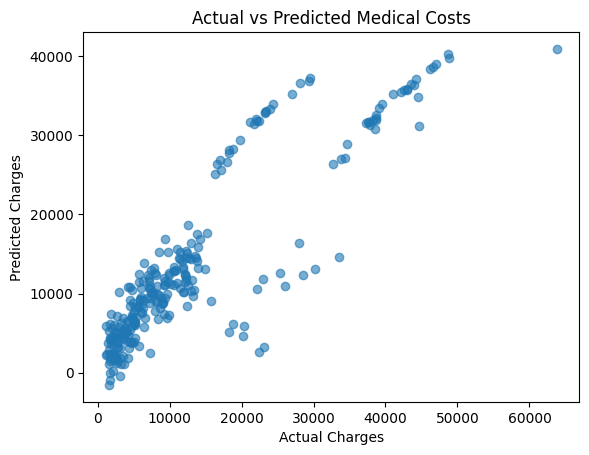

In [ ]:
# Visualisasi
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Costs")
plt.show()